In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import json

In [2]:
path = r'C:\Users\sebastian sossa\Documents\reto_kushki\DATA1.csv'
df = pd.read_csv(path)

### EDA

In [3]:
df.head(2)

,ticket_number,method,date,response_text,transaction_status,brand,transaction_type,number_of_months,metadata,subscription_metadata,processor_name,recap,security,paper
0,1.556687e+15,transfer,2019-05-02T00:01:28-05:00,NaN,APPROVAL,TOLL,SALE,NaN,"{Type"":""CI"",""kind"":""query"",""Numeric"":""0321X562...",NaN,Highway Processor,NaN,NaN,NaN
1,1.556687e+15,transfer,2019-05-02T00:04:24-05:00,NaN,APPROVAL,TOLL,SALE,NaN,"{Type"":""CI"",""kind"":""plastic"",""Numeric"":""0321X5...",NaN,Highway Processor,NaN,NaN,NaN


In [4]:
print(df.columns)
print(df.shape)

Index(['ticket_number', 'method', 'date', 'response_text',
       'transaction_status', 'brand', 'transaction_type', 'number_of_months',
       'metadata', 'subscription_metadata', 'processor_name', 'recap',
       'security', 'paper'],
      dtype='object')
(5956, 14)


Tenemos un dataset con 5956 rows y 14 columnas

In [5]:
df['paper'].unique()

array([           nan, 1.55671813e+09, 1.55671821e+09, 1.55672183e+09,
       1.55672230e+09, 1.55672867e+09, 1.55672943e+09, 1.55658242e+09,
       1.55674570e+09, 1.55674677e+09, 1.55675744e+09, 1.55676337e+09,
       1.55679952e+09, 1.55680209e+09, 1.55680229e+09, 1.55680240e+09,
       1.55680413e+09, 1.55680486e+09, 1.55680490e+09, 1.55680499e+09,
       1.55680573e+09, 1.55680579e+09, 1.55680641e+09, 1.55680656e+09,
       1.55680688e+09, 1.55680743e+09, 1.55680828e+09, 1.55680861e+09,
       1.55680874e+09, 1.55680927e+09, 1.55680946e+09, 1.55680959e+09,
       1.55681105e+09, 1.55681244e+09, 1.55681312e+09, 1.55681605e+09,
       1.55681613e+09, 1.55681738e+09, 1.55681762e+09, 1.55681794e+09,
       1.55682169e+09, 1.55682182e+09, 1.55682208e+09, 1.55682231e+09,
       1.55682334e+09, 1.55682390e+09, 1.55682418e+09, 1.55682449e+09,
       1.55682453e+09, 1.55682582e+09, 1.55657696e+09, 1.55682654e+09,
       1.55682680e+09, 1.55682303e+09, 1.55682989e+09, 1.55683026e+09,
      

In [6]:
print(df.dtypes)

ticket_number            float64
method                    object
date                      object
response_text             object
transaction_status        object
brand                     object
transaction_type          object
number_of_months         float64
metadata                  object
subscription_metadata    float64
processor_name            object
recap                     object
security                 float64
paper                    float64
dtype: object


In [7]:
print(df.isnull().sum())

ticket_number             504
method                      0
date                        0
response_text            4245
transaction_status          0
brand                       0
transaction_type            0
number_of_months         4245
metadata                    0
subscription_metadata    5956
processor_name             23
recap                    5955
security                 5956
paper                    5893
dtype: int64


Las columnas de paper, recap y paper tienen en su mayoria datos nulos

In [8]:
print(df['metadata'][0])

{Type":"CI","kind":"query","Numeric":"0321X5627920554","name":"Marina quiñonez de vera","id":"1556686891823050","transactionId":"20091802","user":"ddaniela.correavbfro.32lowone.cl","transactionResult":"created","token":"7d67f8fd3b5a43709ff21426eeddc2c2"}"


La columna 'metadata' tiene una gran cantidad de datos que nos puede ser de ayuda, por lo que vamos a extraer los datos de esta columna, que estan en formato de diccionario y vamos a crear un nuevo dataset

## Primera tarea

In [9]:
df.head(2)

,ticket_number,method,date,response_text,transaction_status,brand,transaction_type,number_of_months,metadata,subscription_metadata,processor_name,recap,security,paper
0,1.556687e+15,transfer,2019-05-02T00:01:28-05:00,NaN,APPROVAL,TOLL,SALE,NaN,"{Type"":""CI"",""kind"":""query"",""Numeric"":""0321X562...",NaN,Highway Processor,NaN,NaN,NaN
1,1.556687e+15,transfer,2019-05-02T00:04:24-05:00,NaN,APPROVAL,TOLL,SALE,NaN,"{Type"":""CI"",""kind"":""plastic"",""Numeric"":""0321X5...",NaN,Highway Processor,NaN,NaN,NaN


Creamos una lista por los intervalos de tiempo que vamos a analizar

In [10]:
hours_list = [f"{i:02d}:00 - {i:02d}:59" for i in range(24)]

In [11]:
df['date'][0]

'2019-05-02T00:01:28-05:00'

El formato esta en string, para la tarea lo necesitamos en datetime

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df['date'][0]

Timestamp('2019-05-02 00:01:28-0500', tz='pytz.FixedOffset(-300)')

In [14]:
df_h = df
df_h['HOUR'] = pd.cut(df['date'].dt.hour, bins=range(0,25), labels=hours_list)
transactions_by_hour = df_h.groupby('HOUR').size().reset_index(name='#TRXS')

Descargamos la nueva tabla en excel

In [15]:
transactions_by_hour.to_excel('transactions_by_hour.xlsx', index=False)

## Segunda tarea

En base a los datos generados en la nueva tabla Número de Ventas por Hora, generar y 
presentar resumen de estadística descriptiva (Media, Mediana, Moda, Desviación 
Estándar, Varianza, Rango, Min, Max, etc.). ¿Existen puntos calientes de venta durante 
el día? ¿Qué indica la varianza con respecto al comportamiento de ventas durante el 
día? ¿Es el número de observaciones de esta nueva tabla suficiente para tener 
conclusiones definitivas? 

In [16]:
transactions_by_hour.describe()

,#TRXS
count,24.000000
mean,247.708333
std,214.726617
min,0.000000
25%,23.750000
50%,263.000000
75%,414.500000
max,600.000000


In [17]:
transactions_by_hour.columns

Index(['HOUR', '#TRXS'], dtype='object')

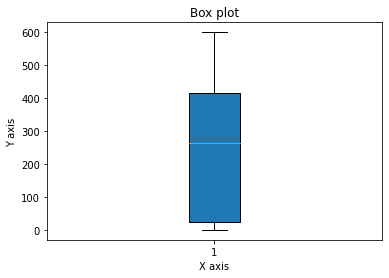

In [18]:
# Create a scatter plot
plt.boxplot(transactions_by_hour['#TRXS'], vert=True, patch_artist=True)
plt.title('Box plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


La media de transacciones en el dia es 247 transacciones por hora, teniendo una maxima de transacciones en el dia de 600 transacciones en una hora y minimo cero transacciones en una hora. 
Igualmente como podemos evidenciar, no tenemos outliers extremos, que salgan del rango inter cuartil. 
El el boxplor podriamos ver un tipo de distribucion que tiende hacia los valores inferiores, pero la media esta mas o menos en la mitad de la grafica

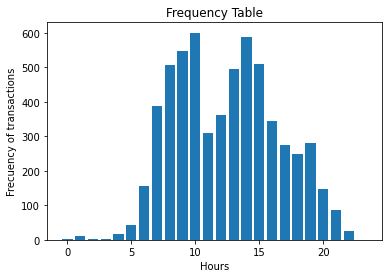

In [19]:
label_hour = [ i for i in range(0,24)]

plt.bar(label_hour, transactions_by_hour['#TRXS'])

# set labels and title
plt.xlabel('Hours')
plt.ylabel('Frecuency of transactions')
plt.title('Frequency Table')

# show the plot
plt.show()


En este grafico de frecuencias podemos evidenciar Double-Peaked Normal Distribution.
Podemos evidenciar dos horas picos donde se realizan el maximo de transacciones, a las 10:00 horas y a las 12:00 horas, registrandose 600 y 589 transacciones respectivamente. 
Tambien podemos decir que desde las 23:00 las 3:00 son horas muertas en cantidad de transacciones, siendo las 23:00 las hora donde se presentan menos transacciones, siendo cero la cantidad de transacciones.

In [20]:
max_value = df['date'].max()
min_value = df['date'].min()
print(max_value)
print(min_value)


2019-05-02 23:58:28-05:00
2019-05-02 00:01:28-05:00


La cantidad de datos en el dataset (5956) puede ser concluyente para analizar el comportamiento de transacciones en el dia determinado donde se realizo el analisis que es el 02/05/2019, sin embargo, no podemos tener conclusiones, fuera de ese dia, ya que el comportamiento puede variar dependiendo del dia de la semana, la epoca del año, etc. 

## Tercer tarea

El dataset DATA1 contiene el campo con nombre “metadata” que constituye un string 
de texto con varios atributos adicionales de cada transacción/registro. Buscar el 
mecanismo para que dichos atributos adicionales se presenten como campos 
adicionales (columnas) de cada transacción en una nueva tabla. Indicar el mecanismo 
utilizado para esta extracción. 

In [21]:
df['metadata'][0]

'{Type":"CI","kind":"query","Numeric":"0321X5627920554","name":"Marina quiñonez de vera","id":"1556686891823050","transactionId":"20091802","user":"ddaniela.correavbfro.32lowone.cl","transactionResult":"created","token":"7d67f8fd3b5a43709ff21426eeddc2c2"}"'

Podemos ver que los datos contenidos dentro de metadata tienen forma de diccionario, el diccionario es un tipo de dato que mas adelante podriamos convertir en columnas de un pandas dataframe. Dentro de esta columna de datos, hay una columna llamada id, que supongo que es el mismo ticknumber del dataset principal

In [22]:
df['ticket_number'][0]

1556686892267430.0

In [23]:
first_metada =  '{' + '"' + str(df['metadata'][0]).replace('{','').replace('}','')[:-1] + '}'
print(first_metada)
dictionary_firt = json.loads(first_metada)
dictionary_firt["id"]

{"Type":"CI","kind":"query","Numeric":"0321X5627920554","name":"Marina quiñonez de vera","id":"1556686891823050","transactionId":"20091802","user":"ddaniela.correavbfro.32lowone.cl","transactionResult":"created","token":"7d67f8fd3b5a43709ff21426eeddc2c2"}


'1556686891823050'

Los datos de la columna metadata no tienen un correcto formato por lo que en este caso, arreglamos el formato para poder ser convertidos a diccionario por medio de la libreria json

In [24]:
def clean_metadata(metadata):
    metadata = metadata.replace("'", '"')
    # Remove trailing quote
    metadata = metadata.rstrip('"')
    metadata = '{' + '"' + metadata[1:]
    return metadata

df['metadata'] = df['metadata'].apply(clean_metadata)

Al principio tratamos de convertir los datos que estan en formato json, en columnas dentro del dataframe, pero teniamos un error dentro del dataset, por lo que usamos eval() para encontrar donde esta el error y arregrarlo

In [25]:
for i, s in enumerate(df['metadata']):
    try:
        dictionary = eval(s)
    except SyntaxError:
        print(f"SyntaxError in row {i+1}: {s}")


SyntaxError in row 1878: {"Type":"CI","kind":"plastic","Numeric":"0321X56830059566","name":"optima tm sas


Encontramos que el error esta en la fila 1877, por lo que la arreglamos para proceder con la creacion del dataset

In [26]:
df['metadata'][1877] = df['metadata'][1877][:-1] + '"' + '}'

C:\Users\sebastian sossa\AppData\Local\Temp\ipykernel_6124\372945192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['metadata'][1877] = df['metadata'][1877][:-1] + '"' + '}'


In [27]:
df['metadata'][1877]

'{"Type":"CI","kind":"plastic","Numeric":"0321X56830059566","name":"optima tm sa"}'

Una vez arreglado, creamos las columnas nuevas a partir de los datos proporcionados por la columna metadata

In [28]:
df = pd.concat([df, pd.json_normalize(df['metadata'].apply(json.loads))], axis=1)

In [29]:
df.columns

Index(['ticket_number', 'method', 'date', 'response_text',
       'transaction_status', 'brand', 'transaction_type', 'number_of_months',
       'metadata', 'subscription_metadata', 'processor_name', 'recap',
       'security', 'paper', 'HOUR', 'Type', 'kind', 'Numeric', 'name', 'id',
       'transactionId', 'user', 'transactionResult', 'token', 'id3', 'office',
       'documentType'],
      dtype='object')

In [30]:
df.shape

(5956, 27)

En este caso nos queda un dataset con 5956 filas y 27 columnas

## Cuarta tarea

En base al dataset DATA1, determinar la tasa de aceptación general del día. PISTA: Tasa 
Aceptación= (Nro. Transacciones Aprobadas / Nro. Total de Transacciones). 

In [31]:
df.head(1)

,ticket_number,method,date,response_text,transaction_status,brand,transaction_type,number_of_months,metadata,subscription_metadata,processor_name,recap,security,paper,HOUR,Type,kind,Numeric,name,id,transactionId,user,transactionResult,token,id3,office,documentType
0,1.556687e+15,transfer,2019-05-02 00:01:28-05:00,NaN,APPROVAL,TOLL,SALE,NaN,"{""Type"":""CI"",""kind"":""query"",""Numeric"":""0321X56...",NaN,Highway Processor,NaN,NaN,NaN,NaN,CI,query,0321X5627920554,Marina quiñonez de vera,1556686891823050,20091802,ddaniela.correavbfro.32lowone.cl,created,7d67f8fd3b5a43709ff21426eeddc2c2,NaN,NaN,NaN


Verificamos si los datos de la columna estan correctos

In [32]:
df['transaction_status'].unique()

array(['APPROVAL', 'DECLINED'], dtype=object)

Verificamos si la columna tiene datos nulos 

In [33]:
df['transaction_status'].isnull().sum()

0

No tenemos ningun dato nulo 

In [34]:
numero_aprobadas = df['transaction_status'].str.contains('APPROVAL').sum()
numero_no_aprobadas = df['transaction_status'].str.contains('DECLINED').sum()
total = numero_aprobadas + numero_no_aprobadas
print(f'Camtidad de transacciones aprobadas {numero_aprobadas}')
print(f'Camtidad de transacciones NO aprobadas {numero_no_aprobadas}')
print(f'Total de transacciones {total} ')
print(f'Cantidad de filas en el dataset {df.shape[0]}')

Camtidad de transacciones aprobadas 4586
Camtidad de transacciones NO aprobadas 1370
Total de transacciones 5956 
Cantidad de filas en el dataset 5956


Tenemos 4586 transacciones aprobadas, 1370 no aprobadas y la suma entre las dos nos da un total de 5956. Lo que coincide con el numero de filas en el dataset, por lo que podemos comprobar que los datos estan bien

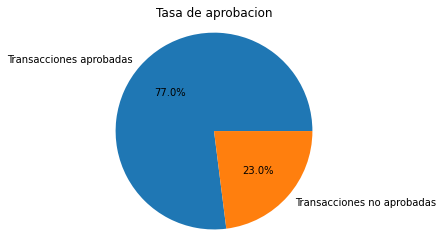

In [83]:
sizes = [numero_aprobadas, numero_no_aprobadas]
labels = ['Transacciones aprobadas', 'Transacciones no aprobadas']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.axis('equal')
plt.title('Tasa de aprobacion')
plt.show()

In [35]:
tasa_de_aceptacion = str((numero_aprobadas/total)*100) + '%'
print(f'La tasa de aceptacion del dia es {tasa_de_aceptacion}')

La tasa de aceptacion del dia es 76.99798522498321%


## Quinta tarea

In [36]:
df['method'].isnull().sum()

0

In [37]:
df.head(1)

,ticket_number,method,date,response_text,transaction_status,brand,transaction_type,number_of_months,metadata,subscription_metadata,processor_name,recap,security,paper,HOUR,Type,kind,Numeric,name,id,transactionId,user,transactionResult,token,id3,office,documentType
0,1.556687e+15,transfer,2019-05-02 00:01:28-05:00,NaN,APPROVAL,TOLL,SALE,NaN,"{""Type"":""CI"",""kind"":""query"",""Numeric"":""0321X56...",NaN,Highway Processor,NaN,NaN,NaN,NaN,CI,query,0321X5627920554,Marina quiñonez de vera,1556686891823050,20091802,ddaniela.correavbfro.32lowone.cl,created,7d67f8fd3b5a43709ff21426eeddc2c2,NaN,NaN,NaN


En base al dataset DATA1, determinar la tasa de aceptación del día de venta especifica 
por: 
a. Método (“method”) 
b. Marca (“brand”) 
c. Procesador (“processor_name”)

### Tasa de aprovacion por metodo 

In [38]:
df['method'].unique()

array(['transfer', 'card', 'cash'], dtype=object)

In [39]:
aprobada_transfer = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['method'].str.contains('transfer')].shape[0] 
total_transfer = df['method'].str.contains('transfer').sum()
tasa_transfer = (aprobada_transfer/df.shape[0])*100

aprobada_card = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['method'].str.contains('card')].shape[0]
total_card = df['method'].str.contains('card').sum()
tasa_card = (aprobada_card/df.shape[0])*100

aprobada_cash = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['method'].str.contains('cash')].shape[0]
total_cash = df['method'].str.contains('cash').sum()
tasa_cash = (aprobada_cash/df.shape[0])*100


total = total_cash + total_card + total_transfer
print(aprobada_transfer)
print(aprobada_card)
print(aprobada_cash)
print(total)
print(df.shape[0])



3376
1207
3
5956
5956


In [40]:
print(f'Tasa de aprovacion por transaferencia {tasa_transfer}')
print(f'Tasa de aprovacion por card {tasa_card}')
print(f'Tasa de aprovacion por cash {tasa_cash}')
tasa_total_aprovacion = tasa_card  + tasa_cash + tasa_transfer
print(f'La tasa total de aprovacion es de {tasa_total_aprovacion}')


Tasa de aprovacion por transaferencia 56.68233713901948
Tasa de aprovacion por card 20.26527871054399
Tasa de aprovacion por cash 0.05036937541974479
La tasa total de aprovacion es de 76.99798522498321


### Tasa de aprovacion por marca

In [41]:
df.head(1)

,ticket_number,method,date,response_text,transaction_status,brand,transaction_type,number_of_months,metadata,subscription_metadata,processor_name,recap,security,paper,HOUR,Type,kind,Numeric,name,id,transactionId,user,transactionResult,token,id3,office,documentType
0,1.556687e+15,transfer,2019-05-02 00:01:28-05:00,NaN,APPROVAL,TOLL,SALE,NaN,"{""Type"":""CI"",""kind"":""query"",""Numeric"":""0321X56...",NaN,Highway Processor,NaN,NaN,NaN,NaN,CI,query,0321X5627920554,Marina quiñonez de vera,1556686891823050,20091802,ddaniela.correavbfro.32lowone.cl,created,7d67f8fd3b5a43709ff21426eeddc2c2,NaN,NaN,NaN


In [42]:
df['brand'].isnull().sum()

0

No tiene valores nulos

In [43]:
df['brand'].unique()

array(['TOLL', 'DOUBLERING', 'VICTORIAN', 'BANKROAD', 'WANNABE',
       'CLINTON'], dtype=object)

Marcas a analizar

In [44]:
aprobada_TOLL = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['brand'].str.contains('TOLL')].shape[0] 
total_TOLL = df['brand'].str.contains('TOLL').sum()


aprobada_DOUBLERING = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['brand'].str.contains('DOUBLERING')].shape[0] 
total_DOUBLERING = df['brand'].str.contains('DOUBLERING').sum()


aprobada_VICTORIAN = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['brand'].str.contains('VICTORIAN')].shape[0] 
total_VICTORIAN = df['brand'].str.contains('VICTORIAN').sum()

aprobada_BANKROAD = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['brand'].str.contains('BANKROAD')].shape[0] 
total_BANKROAD = df['brand'].str.contains('BANKROAD').sum()

aprobada_WANNABE = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['brand'].str.contains('WANNABE')].shape[0] 
total_WANNABE = df['brand'].str.contains('WANNABE').sum()

aprobada_CLINTON = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['brand'].str.contains('CLINTON')].shape[0] 
total_CLINTON = df['brand'].str.contains('CLINTON').sum()

suma_marcas = total_TOLL + total_DOUBLERING + total_VICTORIAN + total_BANKROAD + total_WANNABE + total_CLINTON
print(suma_marcas)
print(df.shape[0])

5956
5956


In [45]:
tasa_TOLL = (aprobada_TOLL/suma_marcas)*100
tasa_DOUBLERING = (aprobada_DOUBLERING/suma_marcas)*100
tasa_VICTORIAN = (aprobada_VICTORIAN/suma_marcas)*100
tasa_BANKROAD = (aprobada_BANKROAD/suma_marcas)*100
tasa_WANNABE = (aprobada_WANNABE/suma_marcas)*100
tasa_CLINTON = (aprobada_CLINTON/suma_marcas)*100
print(f'Tasa de aprovacion por TOLL {tasa_TOLL}')
print(f'Tasa de aprovacion por DOUBLERING {tasa_DOUBLERING}')
print(f'Tasa de aprovacion por VICTORIAN {tasa_VICTORIAN}')
print(f'Tasa de aprovacion por BANKROAD {tasa_BANKROAD }')
print(f'Tasa de aprovacion por WANNABE {tasa_WANNABE }')
print(f'Tasa de aprovacion por CLINTON {tasa_CLINTON }')
comprob = tasa_TOLL +  tasa_DOUBLERING + tasa_VICTORIAN + tasa_BANKROAD + tasa_WANNABE + tasa_CLINTON
print(comprob)



Tasa de aprovacion por TOLL 56.68233713901948
Tasa de aprovacion por DOUBLERING 7.975151108126259
Tasa de aprovacion por VICTORIAN 11.85359301544661
Tasa de aprovacion por BANKROAD 0.05036937541974479
Tasa de aprovacion por WANNABE 0.4365345869711216
Tasa de aprovacion por CLINTON 0.0
76.99798522498321


### Tasa de aprovacion por procesador

In [46]:
df.head(1)

,ticket_number,method,date,response_text,transaction_status,brand,transaction_type,number_of_months,metadata,subscription_metadata,processor_name,recap,security,paper,HOUR,Type,kind,Numeric,name,id,transactionId,user,transactionResult,token,id3,office,documentType
0,1.556687e+15,transfer,2019-05-02 00:01:28-05:00,NaN,APPROVAL,TOLL,SALE,NaN,"{""Type"":""CI"",""kind"":""query"",""Numeric"":""0321X56...",NaN,Highway Processor,NaN,NaN,NaN,NaN,CI,query,0321X5627920554,Marina quiñonez de vera,1556686891823050,20091802,ddaniela.correavbfro.32lowone.cl,created,7d67f8fd3b5a43709ff21426eeddc2c2,NaN,NaN,NaN


In [47]:
df['processor_name'].isnull().sum()

23

In [48]:
df['processor_name'] = df['processor_name'].fillna('Sin registro')

Tenemos 23 datos nulos en la columna processor_name 

In [49]:
df['processor_name'].unique()

array(['Highway Processor', 'Rainbow Processor', 'Watermelon Processor',
       'Sin registro'], dtype=object)

In [50]:
aprobada_Highway = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['processor_name'].str.contains('Highway Processor')].shape[0] 
total_Highway = df['processor_name'].str.contains('Highway Processor').sum()

aprobada_Rainbow = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['processor_name'].str.contains('Rainbow Processor')].shape[0] 
total_Rainbow = df['processor_name'].str.contains('Rainbow Processor').sum()

aprobada_Watermelon = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['processor_name'].str.contains('Watermelon Processor')].shape[0] 
total_Watermelon = df['processor_name'].str.contains('Watermelon Processor').sum()

aprobada_sin = df.loc[df['transaction_status'].str.contains('APPROVAL') & df['processor_name'].str.contains('Sin registro')].shape[0] 
total_sin = df['processor_name'].str.contains('Sin registro').sum()

total_process = total_Rainbow + total_Highway + total_Watermelon + total_sin
print(total_process)


5956


In [51]:
tasa_Highway = (aprobada_Highway/total_process)*100
tasa_Rainbow = (aprobada_Rainbow/total_process)*100
tasa_Watermelon = (aprobada_Watermelon/total_process)*100
tasa_sin = (aprobada_sin/total_process)*100

print(f'Tasa de aprovacion por Highway Processor {tasa_Highway}')
print(f'Tasa de aprovacion por Rainbow Processor {tasa_Rainbow}')
print(f'Tasa de aprovacion por Watermelon Processor {tasa_Watermelon}')
print(f'Tasa de aprovacion sin registro  {tasa_sin }')
comprob_proces = tasa_Highway + tasa_Rainbow + tasa_Watermelon + tasa_sin 
print(comprob_proces)

Tasa de aprovacion por Highway Processor 56.66554734721289
Tasa de aprovacion por Rainbow Processor 20.26527871054399
Tasa de aprovacion por Watermelon Processor 0.05036937541974479
Tasa de aprovacion sin registro  0.0167897918065816
76.99798522498322


## Sexta tarea

En base al dataset DATA1, construir y presentar una nueva tabla que muestre 
Tasa de Aceptación por cada hora del día de venta. 

In [52]:
df.head(1)

,ticket_number,method,date,response_text,transaction_status,brand,transaction_type,number_of_months,metadata,subscription_metadata,processor_name,recap,security,paper,HOUR,Type,kind,Numeric,name,id,transactionId,user,transactionResult,token,id3,office,documentType
0,1.556687e+15,transfer,2019-05-02 00:01:28-05:00,NaN,APPROVAL,TOLL,SALE,NaN,"{""Type"":""CI"",""kind"":""query"",""Numeric"":""0321X56...",NaN,Highway Processor,NaN,NaN,NaN,NaN,CI,query,0321X5627920554,Marina quiñonez de vera,1556686891823050,20091802,ddaniela.correavbfro.32lowone.cl,created,7d67f8fd3b5a43709ff21426eeddc2c2,NaN,NaN,NaN


In [53]:
hours_list_aceptacion = [f"{i:02d}:00 - {i:02d}:59" for i in range(24)]

In [54]:
df['date'][0]

Timestamp('2019-05-02 00:01:28-0500', tz='pytz.FixedOffset(-300)')

In [55]:
df_approval = df[df['transaction_status'] == 'APPROVAL'] 
df_approval['HOUR'] = pd.cut(df_approval['date'].dt.hour, bins=range(0,25), labels=hours_list)
transactions_by_hour_approval = df_approval.groupby('HOUR').size().reset_index(name='aceptacion')


C:\Users\sebastian sossa\AppData\Local\Temp\ipykernel_6124\3993330663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_approval['HOUR'] = pd.cut(df_approval['date'].dt.hour, bins=range(0,25), labels=hours_list)


In [56]:
transactions_by_hour_approval['total'] = transactions_by_hour['#TRXS']

In [57]:
transactions_by_hour_approval['tasa_aprovacion'] = round((transactions_by_hour_approval['aceptacion'] / transactions_by_hour_approval['total']) * 100)
transactions_by_hour_approval

,HOUR,aceptacion,total,tasa_aprovacion
0,00:00 - 00:59,3,3,100.0
1,01:00 - 01:59,10,12,83.0
2,02:00 - 02:59,3,3,100.0
3,03:00 - 03:59,0,1,0.0
4,04:00 - 04:59,16,17,94.0
5,05:00 - 05:59,33,42,79.0
6,06:00 - 06:59,121,157,77.0
7,07:00 - 07:59,289,388,74.0
8,08:00 - 08:59,377,507,74.0
9,09:00 - 09:59,440,547,80.0


## septima tarea

En base a los datos generados en la nueva tabla Tasa de Aceptación por Hora, 
generar y presentar resumen de estadística descriptiva. ¿Qué conclusiones 
podemos obtener de la tasa de aceptación en el transcurso de un día de venta? 

In [58]:
transactions_by_hour_approval

,HOUR,aceptacion,total,tasa_aprovacion
0,00:00 - 00:59,3,3,100.0
1,01:00 - 01:59,10,12,83.0
2,02:00 - 02:59,3,3,100.0
3,03:00 - 03:59,0,1,0.0
4,04:00 - 04:59,16,17,94.0
5,05:00 - 05:59,33,42,79.0
6,06:00 - 06:59,121,157,77.0
7,07:00 - 07:59,289,388,74.0
8,08:00 - 08:59,377,507,74.0
9,09:00 - 09:59,440,547,80.0


In [59]:
transactions_by_hour_approval.describe()

,aceptacion,total,tasa_aprovacion
count,24.000000,24.000000,23.000000
mean,190.708333,247.708333,76.391304
std,165.898471,214.726617,18.411309
min,0.000000,0.000000,0.000000
25%,19.000000,23.750000,74.000000
50%,195.500000,263.000000,79.000000
75%,306.500000,414.500000,80.000000
max,476.000000,600.000000,100.000000


Tenemos que la tasa de aprobacion media es de 76.36% duarnte todo el dia. La tasa de aprobacion maxima es de 100% y la tasa de aprobacion minima es de 0%

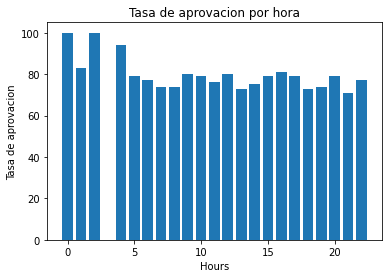

In [60]:
label_hour_approval = [ i for i in range(0,24)]

plt.bar(label_hour_approval, transactions_by_hour_approval['tasa_aprovacion'])

# set labels and title
plt.xlabel('Hours')
plt.ylabel('Tasa de aprovacion')
plt.title('Tasa de aprovacion por hora')

# show the plot
plt.show()

In [61]:
median_approval_rate = transactions_by_hour_approval['tasa_aprovacion'].median()
print('Media de tasa de aprovacion', median_approval_rate)


Media de tasa de aprovacion 79.0


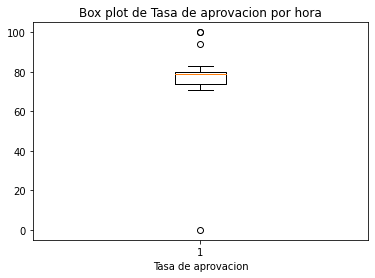

In [62]:

fig, ax = plt.subplots()

ax.boxplot(transactions_by_hour_approval['tasa_aprovacion'].dropna())

ax.set_xlabel('Tasa de aprovacion')
ax.set_title('Box plot de Tasa de aprovacion por hora')

plt.show()

En el box plot podemos evidenciar la dispercion de los datos, la tabla presenta algunos outliers, pero podriamos decir que entre menos transacciones, mas va a variar la tasa de aprobacion, como es el caso de las horas 00:00 , 02:00, 03:00, 04:00. Para tener una conclusion sobre la tasa de aprobacion por horas, de una forma mas acertada, debemos reunir mas datos en horas que no se realizan muchas transacciones.

## Octava tarea

¿Existe una CORRELACION entre el Número de Ventas Efectivas por Hora y la Tasa de 
Aceptación por Hora? Justificar. 

### tasa de aceptacion por hora 

In [63]:
transactions_by_hour_approval

,HOUR,aceptacion,total,tasa_aprovacion
0,00:00 - 00:59,3,3,100.0
1,01:00 - 01:59,10,12,83.0
2,02:00 - 02:59,3,3,100.0
3,03:00 - 03:59,0,1,0.0
4,04:00 - 04:59,16,17,94.0
5,05:00 - 05:59,33,42,79.0
6,06:00 - 06:59,121,157,77.0
7,07:00 - 07:59,289,388,74.0
8,08:00 - 08:59,377,507,74.0
9,09:00 - 09:59,440,547,80.0


In [64]:
correlation = transactions_by_hour_approval['total'].corr(transactions_by_hour_approval['tasa_aprovacion'])
# print the correlation coefficient
print(f'Correlacion entre numero de ventas efectivas por hora, por tasa de aceptacion por hora: {correlation}')

Correlacion entre numero de ventas efectivas por hora, por tasa de aceptacion por hora: 0.03229229608925443


Calculamos la correlacion de pearson entre las dos variables presentadas y nos da un valor de 0.03, lo que significa que hay una correlacion positiva muy minima. El valor que nos arroja la correlacion de pearson es muy bajo por lo que se podria decier que la correlacion es insignificante, casi nula

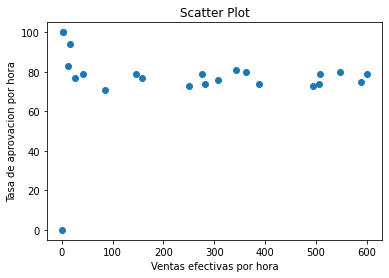

In [65]:
plt.scatter(transactions_by_hour_approval['total'], transactions_by_hour_approval['tasa_aprovacion'])

# add labels and title
plt.xlabel('Ventas efectivas por hora')
plt.ylabel('Tasa de aprovacion por hora')
plt.title('Scatter Plot')

# display the plot
plt.show()

## Novena tarea

Determinar la tasa de aceptación del día en específico por el atributo “office”. ¿Qué se 
puede concluir con respecto a esta relación? ¿Qué valor del atributo “office” es el que 
presenta mejor tasa de aceptación? PISTA: Usar la tabla construida en la tarea 3 

In [66]:
df.head(1)

,ticket_number,method,date,response_text,transaction_status,brand,transaction_type,number_of_months,metadata,subscription_metadata,processor_name,recap,security,paper,HOUR,Type,kind,Numeric,name,id,transactionId,user,transactionResult,token,id3,office,documentType
0,1.556687e+15,transfer,2019-05-02 00:01:28-05:00,NaN,APPROVAL,TOLL,SALE,NaN,"{""Type"":""CI"",""kind"":""query"",""Numeric"":""0321X56...",NaN,Highway Processor,NaN,NaN,NaN,NaN,CI,query,0321X5627920554,Marina quiñonez de vera,1556686891823050,20091802,ddaniela.correavbfro.32lowone.cl,created,7d67f8fd3b5a43709ff21426eeddc2c2,NaN,NaN,NaN


In [67]:
df['office'].unique()

array([nan, '029', '300', '176', '060', '370', '156', '359', '01N', '051',
       '50S', '50N', '041', '307', '350', '001', '045', '040', '192',
       '005', '103', '50C', '080', '078', '152', '150', '280', '290',
       '260', '368', '470', '210', '420', '162', '240', '324', '140',
       '115', '206', '303', '070', '190', '017', '120', '384', '132',
       '442', '166', '314', '378', '230', '252', '028', '088', '196',
       '340', '366', '440', '318', '226', '372', '170', '157', '200',
       '294', '202', '212', '020', '094', '380', '019', '234', '118',
       '072', '225', '232', '270', '346', '090', '357', '026', '025',
       '095', '375', '315', '093', '130', '450', '011', '373', '154',
       '362', '083', '076', '012', '143', '172', '014', '100', '144',
       '037', '248', '024', '064', '015', '236', '321', '312', '160',
       '355', '112', '282', '074', '360', '214', '306', '062', '032',
       '068', '244', '148', '018', '410', '122', '293', '004', '010',
       '180', '

In [68]:
df['office'].isnull().sum()

299

In [69]:
df['office'] = df['office'].fillna('sin_registro')

In [70]:
df['office'].isnull().sum()

0

In [71]:
df.shape

(5956, 27)

In [72]:
transaction_per_office = df.groupby('office').size().reset_index(name='Todos')

In [73]:
print(sum(transaction_per_office['Todos']))

5956


In [74]:
only_approval = df_approval.groupby('office').size().reset_index(name='approval')

In [75]:
print(sum(only_approval['approval']))

4405


In [76]:
merged = pd.merge(transaction_per_office, only_approval, on='office', how='left')


In [77]:
merged = merged.fillna(0)

In [78]:
print(sum(merged['Todos']))
print(sum(merged['approval']))

5956
4405.0


In [79]:
merged['tasa_aprovacion'] = round((merged['approval'] / merged['Todos']) * 100)

In [85]:
merged.sort_values(by='Todos', ascending=0)

,office,Todos,approval,tasa_aprovacion
154,50C,963,767.0,80.0
155,50N,846,655.0,77.0
0,001,435,380.0,87.0
156,50S,432,297.0,69.0
138,370,392,315.0,80.0
...,...,...,...,...
128,346,1,1.0,100.0
104,272,1,1.0,100.0
120,318,1,1.0,100.0
55,122,1,1.0,100.0
